In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sequencer

In [3]:
data = np.loadtxt("../../Filtered_Flux_Grid_dm15")
print (data)

[[0.80989556 0.77863956 0.83557999 ... 0.15915867 0.16926056 0.17789028]
 [0.95929764 0.97065937 0.94475    ... 0.11388313 0.11295258 0.12015513]
 [0.95118008 0.94206646 0.90173456 ... 0.1194942  0.12596318 0.12928852]
 ...
 [0.91984693 0.87137589 0.85043254 ... 0.21966446 0.22661121 0.21897964]
 [0.96758111 0.95379819 0.92943817 ... 0.14176935 0.13795669 0.13655405]
 [0.89850361 0.89732342 0.94498928 ... 0.13018022 0.12006564 0.11977983]]


In [4]:
offset_data = data *100+100
print(offset_data)

[[180.98955573 177.86395625 183.55799876 ... 115.91586651 116.92605589
  117.78902804]
 [195.92976418 197.06593732 194.47500011 ... 111.38831335 111.29525753
  112.01551303]
 [195.11800814 194.20664603 190.1734557  ... 111.94942008 112.59631823
  112.92885184]
 ...
 [191.98469251 187.1375892  185.04325366 ... 121.96644631 122.66112072
  121.89796408]
 [196.75811117 195.37981907 192.94381655 ... 114.17693458 113.79566927
  113.65540537]
 [189.85036058 189.7323418  194.49892835 ... 113.01802183 112.00656429
  111.97798324]]


Sequencer Code

In [5]:
x = np.linspace(3922.0, 7112.0, num=len(data[0]))
print(x)

[3922. 3924. 3926. ... 7108. 7110. 7112.]


In [6]:
indices = np.arange(len(offset_data))
np.random.shuffle(indices)

objects_list_shuffled = offset_data[indices]
grid = np.copy(x)

In [7]:
# define the list of distance metrics to consider.
# I don't include the KL-Divergence because the dataset contains zero values
estimator_list = ['EMD', 'energy', 'L2']

# define the sequencer object with default parameters
seq = sequencer.Sequencer(grid, offset_data, estimator_list)

# to execute the sequencer, we first need to define the output directory to which the different 
# outputs will be saved
output_path = "/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer_output"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 3.894231081008911 seconds
calculating the distance matrices for estimator: EMD, scale: 2
finished calculating this distance matrix list, it took: 4.362967014312744 seconds
calculating the distance matrices for estimator: EMD, scale: 4
finished calculating this distance matrix list, it took: 5.603487968444824 seconds
calculating the distance matrices for estimator: EMD, scale: 8
finished calculating this distance matrix list, it took: 11.11094617843628 seconds
calculating the distance matrices for estimator: EMD, scale: 16
finished calculating this distance matrix list, it took: 12.816282033920288 seconds
calculating the distance matrices for estimator: EMD, scale: 32
finished calculating this distance matrix list, it took: 21.830629110336304 seconds
calculating the distance matrices for estimator: EMD, scale: 64
finished calculating this distance matrix list, it took:

/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer/sequencer_.py:1030: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


In [8]:
# print all the metrics and scales, and examine the intermediate elongations
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   np.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 29.76
metric=EMD, scale=2, elongation: 24.37
metric=EMD, scale=4, elongation: 16.94
metric=EMD, scale=8, elongation: 10.24
metric=EMD, scale=16, elongation: 11.5
metric=EMD, scale=32, elongation: 10.03
metric=EMD, scale=64, elongation: 12.76
metric=energy, scale=1, elongation: 36.34
metric=energy, scale=2, elongation: 20.36
metric=energy, scale=4, elongation: 17.32
metric=energy, scale=8, elongation: 9.31
metric=energy, scale=16, elongation: 13.38
metric=energy, scale=32, elongation: 10.42
metric=energy, scale=64, elongation: 12.77
metric=L2, scale=1, elongation: 14.92
metric=L2, scale=2, elongation: 11.24
metric=L2, scale=4, elongation: 12.17
metric=L2, scale=8, elongation: 9.88
metric=L2, scale=16, elongation: 11.95
metric=L2, scale=32, elongation: 10.16
metric=L2, scale=64, elongation: 6.23


In [9]:
print(final_sequence)
np.savetxt('../../dm15_sequence', final_sequence, "%i")

[ 11  21 125 124 123  59  60 157 156 155 154 153  16  15  17  69  70  14
  41  42  13  97  12  49  98  50  27  26  29  28  53   9   4  87   8  10
  25   7   6  88  86 128  89   5 110 109 111 114  90 152  48 108 112 151
  91 149  85  47  20  92 113 148  31  84 116  43  24  67 129 115 147  35
 117  30  22  19 137  44 105  68 136 118 146 106 150  34 107   2  23  71
  45 103  51 145  33  46   3  72 126 158 119  63  52  54 142  65   0  62
  77  32  66 143  73 104  78  18  75  61 120 122 144 159  80   1  79  76
  74 121  81  82 100  99 101 141  83 140 139  94 102 138 133  37  96 132
  38  36 131  95 134  39 130 135  57  40  58  64  55  56 127  93]


[[0.91054787 0.9098333  0.9028502  ... 0.16293917 0.16375843 0.16343354]
 [0.96215985 0.96420502 0.96700322 ... 0.12818589 0.12827012 0.12940645]
 [0.93210647 0.94963458 0.96258516 ... 0.14194387 0.14156874 0.13818606]
 ...
 [0.91665983 0.95416815 0.9653985  ... 0.15921445 0.15897771 0.16000805]
 [0.82726903 0.75728447 0.91659407 ... 0.14115519 0.13777997 0.14156754]
 [0.93704775 0.93529817 0.90701424 ... 0.14602965 0.14470007 0.14813363]]


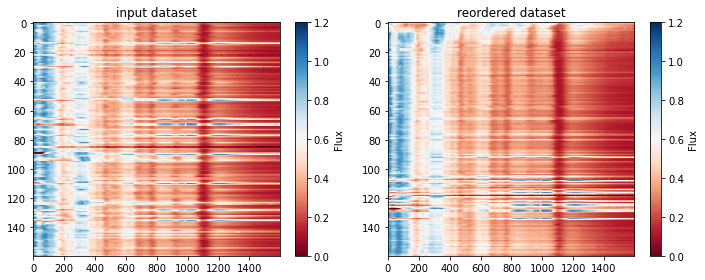

In [10]:
reordered_data = data[final_sequence, :]
np.random.shuffle(data)
print (data)
plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.imshow(data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.subplot(1, 2, 2)
plt.title("reordered dataset")
plt.imshow(reordered_data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.tight_layout()
plt.savefig('../../dm15_Image.pdf', dpi = 300, bbox_inches = 'tight')

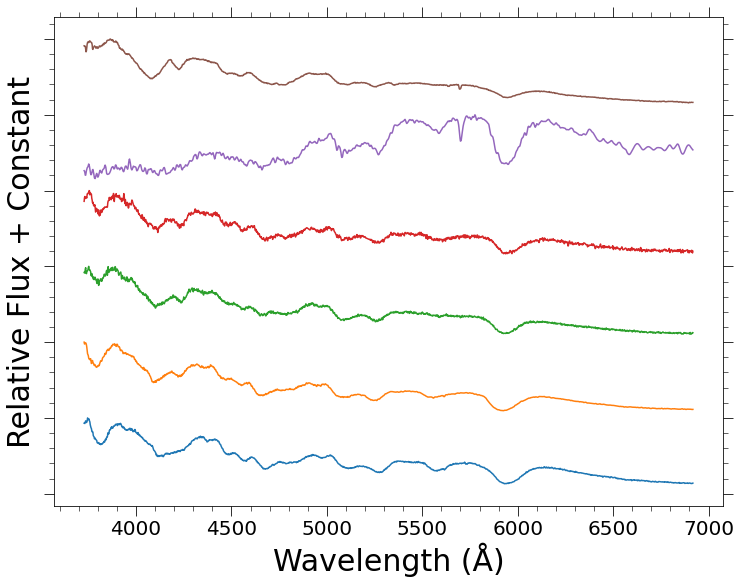

In [11]:
data = np.loadtxt("../../Filtered_Flux_Grid_dm15")

wavelength = []
x = 3728.0

while len(wavelength) < len(data[0]):
    wavelength.append(x)
    x += 2

plt.figure(figsize=(12,9))
plt.xlabel("Wavelength (Å)", fontsize = 30)
plt.ylabel("Relative Flux + Constant", fontsize = 30)

plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)

plt.gca().axes.yaxis.set_ticklabels([])

k=0
while k < (len(final_sequence)):
    k+=1
    if k % 25 == 0:
        plt.plot(wavelength, data[final_sequence[k]]+k/25)

plt.savefig('../../dm15.pdf', dpi = 300, bbox_inches = 'tight')